# Figure 2.c/d : Training efficiency

Goals : 

- Show that 3D models are more efficient in terms of training data needed to reach a certain accuracy, compared to 2D models.
  
(Also shows slight advantage of 3D models in terms of accuracy, and performance of unsupervised model.)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from tifffile import imread
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sys.path.append("../..")

from utils import *
from plots import *

show_params()

Plot parameters (set in plots.py) : 
- COLORMAP : ████████
- DPI : 200
- Data path : C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK
- Font size : 20
- Title font size : 25.0
- Label font size : 20.0


In [3]:
SAVE_PLOTS_AS_PNG = False
SAVE_PLOTS_AS_SVG = True

## Data loading

In [4]:
image_folder = DATA_PATH / "RESULTS/SPLITS/Analysis"
c5 = imread(image_folder / "c5.tif")
c3 = imread(image_folder / "c3.tif")
visual = imread(image_folder / "visual.tif")

visual_slice = 50
# visual_slice = -1

gt_dict = {
    "visual": visual[:visual_slice,:,:],
    "c3": c3,
    "c5": c5,
}

In [5]:
visual_preds = {
    "cellpose": {
        "8020": image_folder / "c1_5/cp/iso_visual_c1-5_visual_8020.tif",
        # "8020": image_folder / "c1_5/cp_radius5/iso_visual_c1-5_visual_8020.tif",
        "6040": image_folder / "c1_5/cp/iso_visual_c1-5_visual_6040.tif",
        # "6040": image_folder / "c1_5/cp_radius5/iso_visual_c1-5_visual_6040.tif"
        "2080": image_folder / "c1_5/cp/iso_visual_c1-5_visual_2080.tif"
    },
    "stardist": {
        "8020": image_folder / "c1_5/sd/stardist_8020_labels.tif",
        "6040": image_folder / "c1_5/sd/stardist_6040_labels.tif",
        "2080": image_folder / "c1_5/sd/stardist_2080_labels.tif"
    },
    "segres": {
        "8020": image_folder / "c1_5/segres/c1_5_8020_SegRes.tif",
        "6040": image_folder / "c1_5/segres/c1_5_6040_SegRes.tif",
        "2080": image_folder / "c1_5/segres/c1_5_2080_SegRes.tif"
        
    },
    "swin": {
        "8020": image_folder / "c1_5/swin/c1-5_8020_Swin.tif",
        "6040": image_folder / "c1_5/swin/c1-5_6040_Swin.tif",
        "2080": image_folder / "c1_5/swin/c1-5_2080_Swin.tif",
    },
}
c3_preds = {
    "cellpose": {
        "8020": image_folder / "c1245_v/cp/c3image_c1245_v_8020.tif",
        "6040": image_folder / "c1245_v/cp/c3image_c1245_v_6040.tif",
        "2080": image_folder / "c1245_v/cp/c3image_c1245_v_2080.tif"
    },
    "stardist": {
        "8020": image_folder / "c1245_v/sd/stardist_8020_labels.tif",
        "6040": image_folder / "c1245_v/sd/stardist_6040_labels.tif",
        "2080": image_folder / "c1245_v/sd/stardist_2080_labels.tif"
    },
    "segres": {
        "8020": image_folder / "c1245_v/segres/c1245-v_8020_SegRes.tif",
        "6040": image_folder / "c1245_v/segres/c1245-v_6040_SegRes.tif",
        "2080": image_folder / "c1245_v/segres/c1245-v_2080_SegRes.tif"
    },
    "swin": {
        "8020": image_folder / "c1245_v/swin/c1245-v_8020_Swin.tif",
        "6040": image_folder / "c1245_v/swin/c1245-v_6040_Swin.tif",
        "2080": image_folder / "c1245_v/swin/c1245-v_2080_Swin.tif"
    },
}
c5_preds = {
    "cellpose": {
        "8020": image_folder / "c1-4_v/cp/c5image_c1-4_v_8020.tif",
        "6040": image_folder / "c1-4_v/cp/c5image_c1-4_v_6040.tif",
        "2080": image_folder / "c1-4_v/cp/c5image_c1-4_v_2080.tif"
    },
    "stardist": {
        "8020": image_folder / "c1-4_v/sd/stardist_8020_labels.tif",
        "6040": image_folder / "c1-4_v/sd/stardist_6040_labels.tif",
        "2080": image_folder / "c1-4_v/sd/stardist_2080_labels.tif"
    },
    "segres": {
        "8020": image_folder / "c1-4_v/segres/c1-4-v_8020_SegRes.tif",
        "6040": image_folder / "c1-4_v/segres/c1-4-v_6040_SegRes.tif",
        "2080": image_folder / "c1-4_v/segres/c1-4-v_2080_SegRes.tif"
    },
    "swin": {
        "8020": image_folder / "c1-4_v/swin/c1-4-v_8020_Swin.tif",
        "6040": image_folder / "c1-4_v/swin/c1-4-v_6040_Swin.tif",
        "2080": image_folder / "c1-4_v/swin/c1-4-v_2080_Swin.tif"
    },
}

In [6]:
cellpose_preds = {
    "2080": {
        "visual": imread(visual_preds["cellpose"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["cellpose"]["2080"]),
        "c5": imread(c5_preds["cellpose"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["cellpose"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["cellpose"]["6040"]),
        "c5": imread(c5_preds["cellpose"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["cellpose"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["cellpose"]["8020"]),
        "c5": imread(c5_preds["cellpose"]["8020"]),
    },
}
stardist_preds = {
    "2080": {
        "visual": imread(visual_preds["stardist"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["stardist"]["2080"]),
        "c5": imread(c5_preds["stardist"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["stardist"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["stardist"]["6040"]),
        "c5": imread(c5_preds["stardist"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["stardist"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["stardist"]["8020"]),
        "c5": imread(c5_preds["stardist"]["8020"]),
    },
}
segres_preds = {
    "2080": {
        "visual": imread(visual_preds["segres"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["segres"]["2080"]),
        "c5": imread(c5_preds["segres"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["segres"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["segres"]["6040"]),
        "c5": imread(c5_preds["segres"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["segres"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["segres"]["8020"]),
        "c5": imread(c5_preds["segres"]["8020"]),
    },
}
swin_preds = {
    "2080": {
        "visual": imread(visual_preds["swin"]["2080"])[:visual_slice,:,:],
        "c3": imread(c3_preds["swin"]["2080"]),
        "c5": imread(c5_preds["swin"]["2080"]),
    },
    "6040": {
        "visual": imread(visual_preds["swin"]["6040"])[:visual_slice,:,:],
        "c3": imread(c3_preds["swin"]["6040"]),
        "c5": imread(c5_preds["swin"]["6040"]),
    },
    "8020": {
        "visual": imread(visual_preds["swin"]["8020"])[:visual_slice,:,:],
        "c3": imread(c3_preds["swin"]["8020"]),
        "c5": imread(c5_preds["swin"]["8020"]),
    },
}
wnet_preds = {
    "2080": {
        "visual": imread(image_folder / "WNet/visual_pred.tif")[:visual_slice,:,:],
        "c3": imread(image_folder / "WNet/c3_pred.tif"),
        "c5": imread(image_folder / "WNet/c5_pred.tif"),
    },
    "6040": {
        "visual": imread(image_folder / "WNet/visual_pred.tif")[:visual_slice,:,:],
        "c3": imread(image_folder / "WNet/c3_pred.tif"),
        "c5": imread(image_folder / "WNet/c5_pred.tif"),
    },
    "8020": {
        "visual": imread(image_folder / "WNet/visual_pred.tif")[:visual_slice,:,:],
        "c3": imread(image_folder / "WNet/c3_pred.tif"),
        "c5": imread(image_folder / "WNet/c5_pred.tif"),
    },
}

## Dice computation

In [7]:
def model_dices_across_splits(model_dict, verbose=False):
    model_dices = {
        "2080": [],
        "6040": [],
        "8020": [],
    }
    for split in model_dict:
        for image in model_dict[split]:
            gt = gt_dict[image]
            pred = model_dict[split][image]
            gt = np.where(gt > 0, 1, 0)
            pred = np.where(pred > 0, 1, 0)
            dice = dice_coeff(gt, pred)
            if verbose:
                print(f"Split: {split}, Image: {image}")
                print(f"Image shape: {model_dict[split][image].shape}")
                print(f"GT shape: {gt_dict[image].shape}")
                print(f"Dice: {dice}")
            model_dices[split].append(dice)
    return model_dices

In [8]:
cellpose_dices = model_dices_across_splits(cellpose_preds)

In [9]:
stardist_dices = model_dices_across_splits(stardist_preds)

In [10]:
segres_dices = model_dices_across_splits(segres_preds)

In [11]:
swin_dices = model_dices_across_splits(swin_preds)

In [12]:
wnet_dices = model_dices_across_splits(wnet_preds)

In [13]:
model_names = [
    "Stardist", 
    "Cellpose", 
    "SegResNet - Ours", 
    "SwinUNetR - Ours", 
    "WNet - Ours"
    ]
models = [cellpose_dices, stardist_dices, segres_dices, swin_dices]
wnet_means = [np.mean(wnet_dices["8020"]), np.mean(wnet_dices["6040"]), np.mean(wnet_dices["2080"])]

plt.rcParams["figure.figsize"] = (8, 8)

In [14]:
# creata a dataframe with each model dice, adding the split as a categorical variable
dices_df = pd.DataFrame(columns=["Model", "Dice", "Split"])
dices_df["Model"] = ["Stardist"] * 9 + ["Cellpose"] * 9 + ["SegResNet - Ours"] * 9 + ["SwinUNetR - Ours"] * 9 + ["WNet - Ours"] * 3
dices_df["Dice"] = stardist_dices["2080"] + stardist_dices["6040"] + stardist_dices["8020"] + cellpose_dices["2080"] + cellpose_dices["6040"] + cellpose_dices["8020"] + segres_dices["2080"] + segres_dices["6040"] + segres_dices["8020"] + swin_dices["2080"] + swin_dices["6040"] + swin_dices["8020"] + wnet_dices["2080"]
dices_df["Split"] = ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["20/80"] * 3 + ["60/40"] * 3 + ["80/20"] * 3 + ["Unsupervised - All data"] * 3

In [15]:
dice_df_t = dices_df.groupby(["Model", "Split"]).apply(lambda x: x, include_groups=False)
dice_df_t

Dice
Model            Split                               
Cellpose         20/80                   9   0.389781
                                         10  0.413332
                                         11  0.434634
                 60/40                   12  0.329755
                                         13  0.461056
                                         14  0.287788
                 80/20                   15  0.546253
                                         16  0.358649
                                         17  0.421258
SegResNet - Ours 20/80                   18  0.781841
                                         19  0.690604
                                         20  0.801169
                 60/40                   21  0.748263
                                         22  0.840746
                                         23  0.617691
                 80/20                   24  0.774276
                                         25  0.773206
                                         26  0.634920
Stardist         20/80                   0   0.700073
                                         1   0.000017
                                         2   0.000024
                 60/40                   3   0.654795
                                         4   0.521939
                                         5   0.725773
                 80/20                   6   0.669636
                                         7   0.522854
                                         8   0.630641
SwinUNetR - Ours 20/80                   27  0.825505
                                         28  0.835875
                                         29  0.835130
                 60/40                   30  0.834037
                                         31  0.848575
                                         32  0.838228
                 80/20                   33  0.843205
                                         34  0.839906
                                         35  0.820599
WNet - Ours      Unsupervised - All data 36  0.817957
                                         37  0.811354
                                         38  0.808755

## Plots

In [16]:
dices_df['Model_Split'] = dices_df['Model'] + ' (' + dices_df['Split'].astype(str) + ')'

C:\Users\Cyril\AppData\Local\Temp\ipykernel_15356\2494682398.py:2: UserWarning: The palette list has more values (16) than needed (13), which may not be intended.
  sns.boxplot(


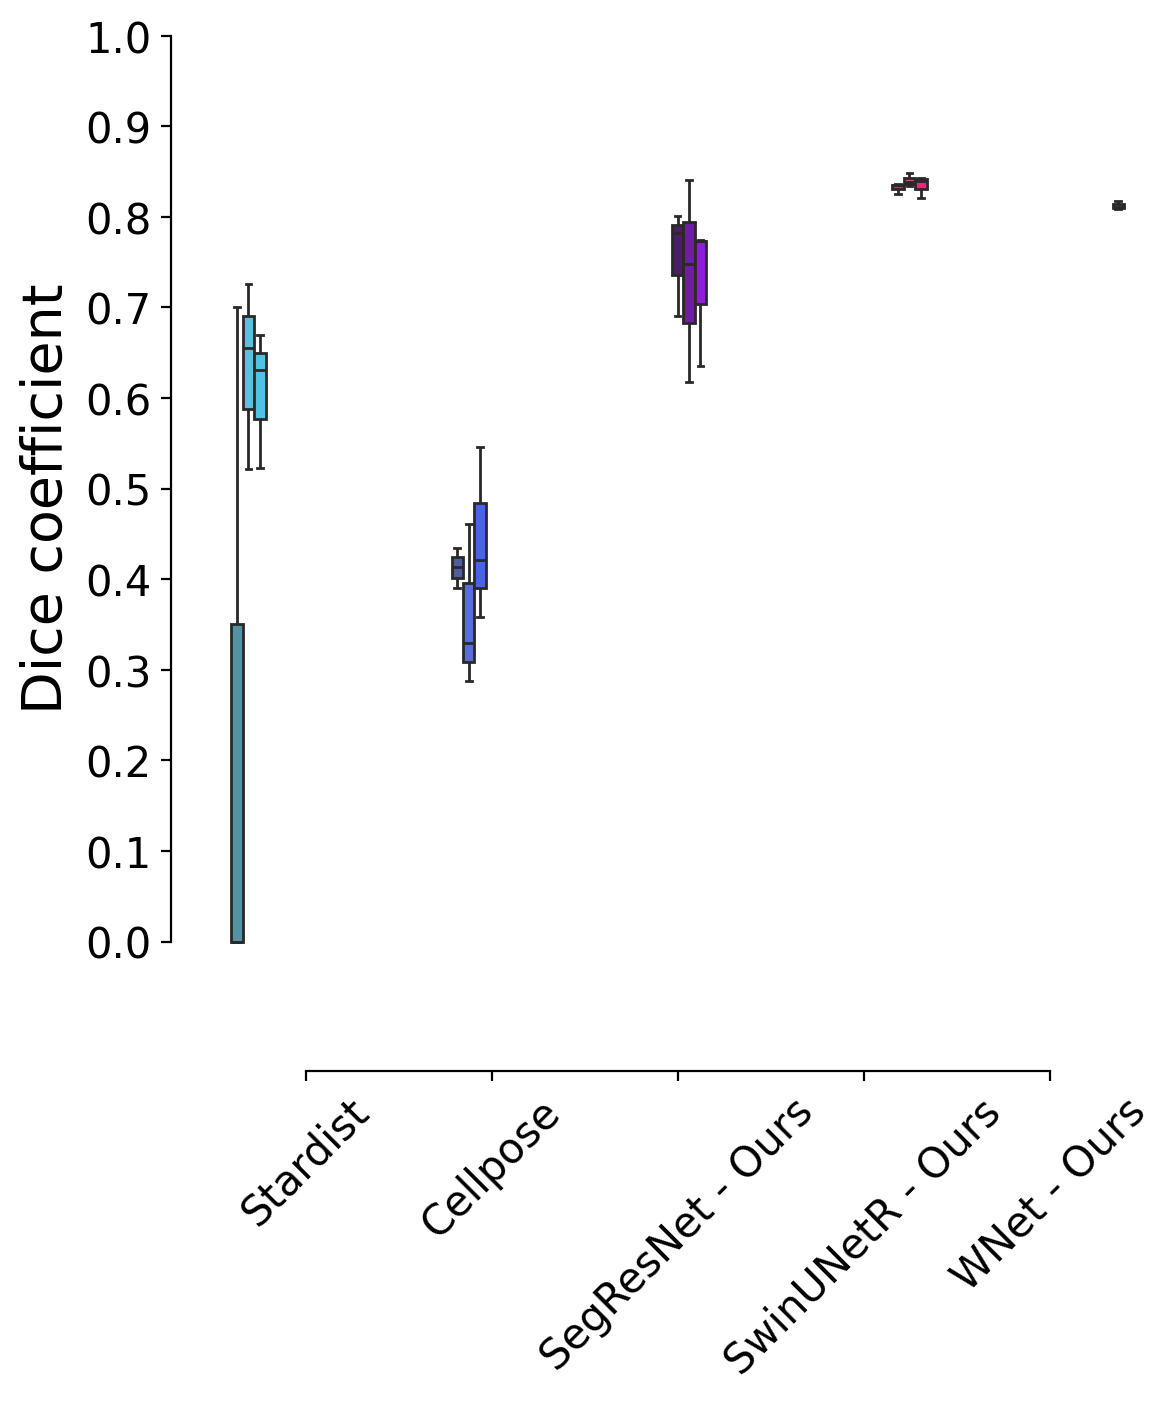

In [17]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=DPI)
sns.boxplot(
    data=dices_df,
    x="Model", 
    y="Dice", 
    hue="Model_Split", 
    ax=ax, 
    palette=EXPANDED_COLORMAP,
    # dodge=False,
    )
for i, artist in enumerate(ax.artists): # try to center the boxplot on xticks
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(artist.get_facecolor())
        if j % 6 == 4: 
            x, y = line.get_xydata()[0]
            x_center = i // 2 
            if i % 2: 
                line.set_xdata([x_center + 0.2, x_center + 0.2, x, x_center + 0.2])
            else:  
                line.set_xdata([x_center - 0.2, x_center - 0.2, x, x_center - 0.2])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=LEGEND_FONT_SIZE)
ax.tick_params(axis = 'x',   rotation = 45)
plt.ylim([-0.02,1])
ax.set_yticks(np.arange(0,1.1,0.1))
sns.despine(
    left=False,
    right=True,
    bottom=False,
    top=True,
    trim=True,
    offset={"bottom": 40, "left": 15},
)
legend = ax.legend(fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=BBOX_TO_ANCHOR, loc=LOC)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
legend.get_frame().set_alpha(0)
ax.set_xlabel("", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("Dice coefficient", fontsize=LABEL_FONT_SIZE)
plt.legend([],[], frameon=False)
plt.show()

if SAVE_PLOTS_AS_PNG:
    fig.savefig("Label_efficiency.png", dpi=DPI, bbox_inches="tight")
if SAVE_PLOTS_AS_SVG:
    fig.savefig("Label_efficiency.svg", bbox_inches="tight")

### Legend

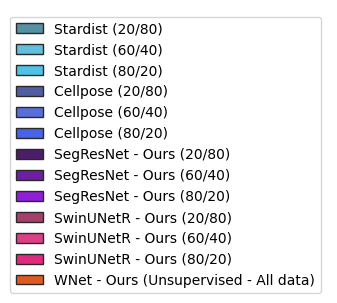

In [18]:
fig_leg = plt.figure(figsize=(3, 2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(handles=legend.legend_handles, labels=[text.get_text() for text in legend.texts])
ax_leg.axis('off')
plt.show()

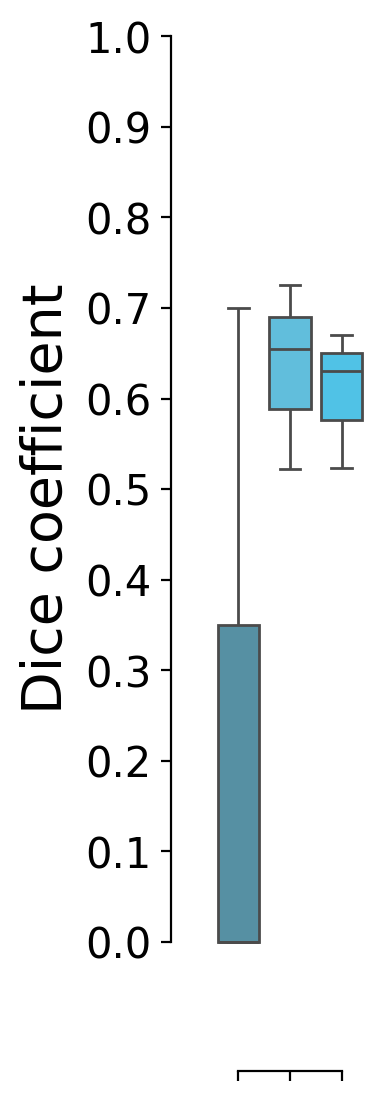

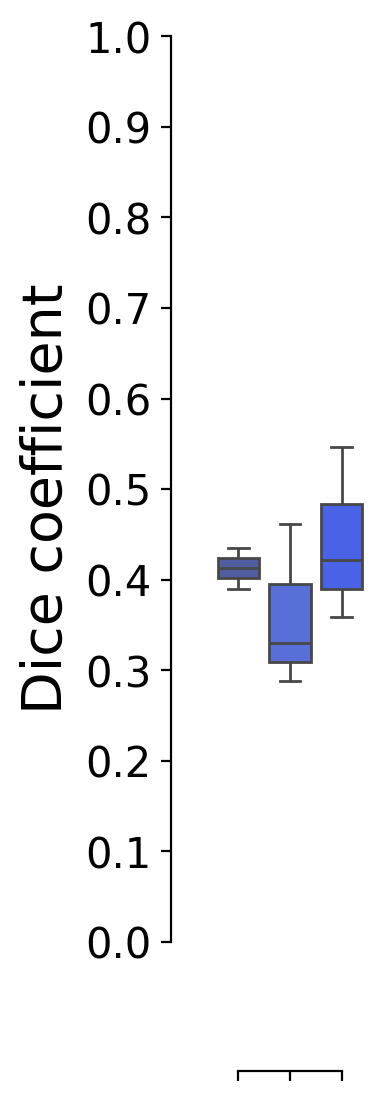

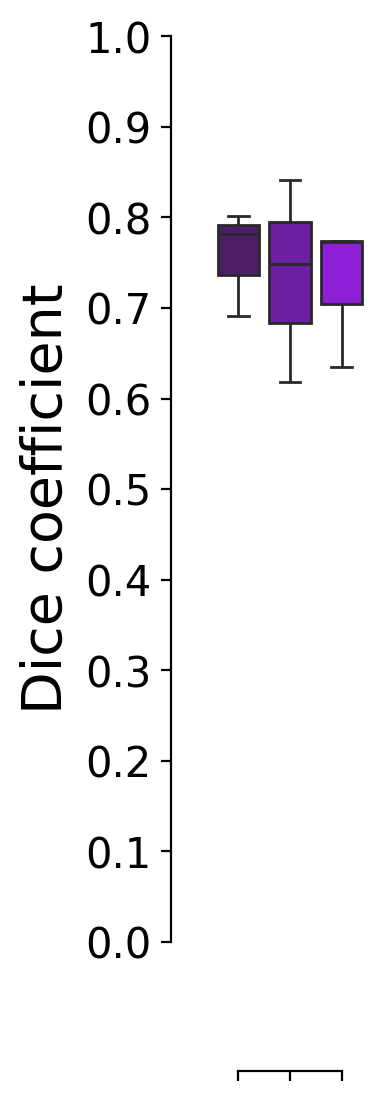

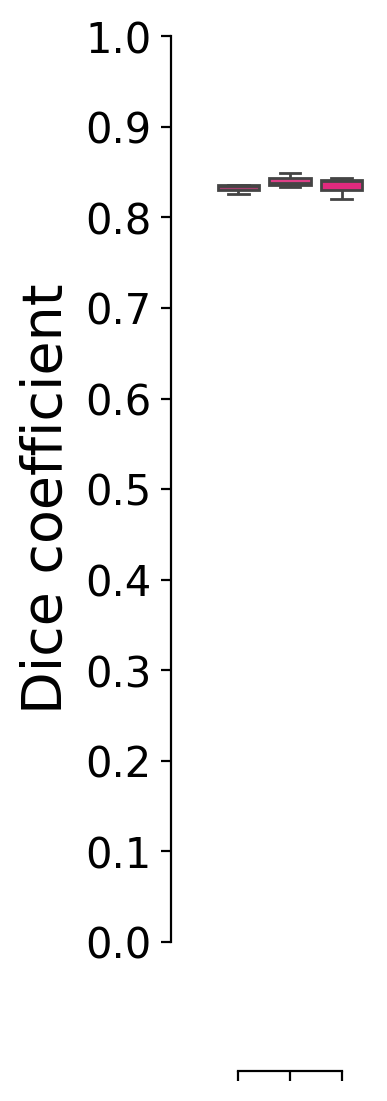

C:\Users\Cyril\AppData\Local\Temp\ipykernel_15356\2891224447.py:8: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(


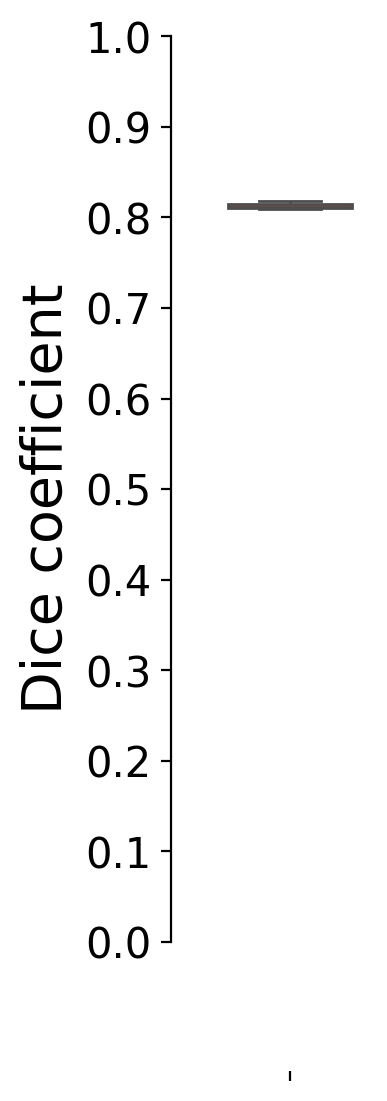

In [19]:
# Render each boxplot separately per model
models_dfs = [dices_df[dices_df["Model"] == model].copy() for model in model_names]
save_path = Path("label_efficiency")
save_path.mkdir(exist_ok=True)
for i, model in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(1, 6), dpi=DPI)
    df = models_dfs[i]
    sns.boxplot(
        data=df,
        x="Model_Split", 
        y="Dice", 
        hue="Split", 
        ax=ax, 
        palette=EXPANDED_COLORMAP[0+3*i:3+3*i],
    )
    ax.tick_params(axis = 'x',   rotation = 45)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis="both", which="major", labelsize=LEGEND_FONT_SIZE)
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.set_ylim([-0.02,1])
    sns.despine(
        left=False,
        right=True,
        bottom=False,
        top=True,
        trim=True,
        offset={"bottom": 40, "left": 15},
        ax=ax
    )
    ax.set_xticklabels("", fontsize=LABEL_FONT_SIZE)
    ax.set_xlabel("", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("Dice coefficient", fontsize=LABEL_FONT_SIZE)
    ax.legend([],[], frameon=False)
    ax.patch.set_alpha(0)
    legend = ax.get_legend()
    if legend:
        legend.remove()
    # ax.set_title(model, fontsize=LABEL_FONT_SIZE)
    plt.show()
    if SAVE_PLOTS_AS_PNG:
        fig.savefig(f"{str(save_path)}/Label_efficiency_{model}.png", dpi=DPI, bbox_inches="tight")
    if SAVE_PLOTS_AS_SVG:
        fig.savefig(f"{str(save_path)}/Label_efficiency_{model}.svg", bbox_inches="tight")

### Zoom-in for rightmost models

C:\Users\Cyril\AppData\Local\Temp\ipykernel_15356\2433563658.py:3: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.boxplot(data=dices_df.iloc[27:,:], x="Model", y="Dice", hue="Split", ax=ax, palette=EXPANDED_COLORMAP[9:], dodge=True)


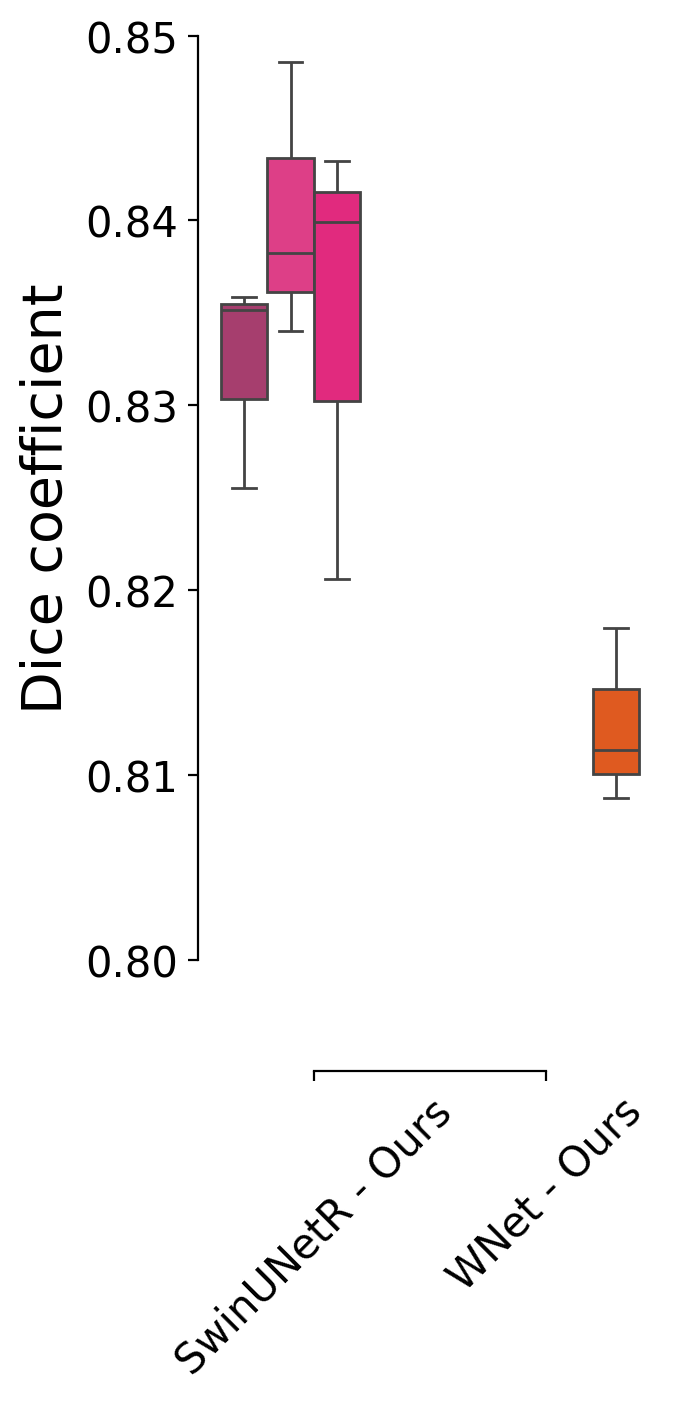

In [20]:
# same as above with Swin and WNet and y axis on the right
fig, ax = plt.subplots(figsize=(3, 6), dpi=DPI)
sns.boxplot(data=dices_df.iloc[27:,:], x="Model", y="Dice", hue="Split", ax=ax, palette=EXPANDED_COLORMAP[9:], dodge=True)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=LEGEND_FONT_SIZE)
ax.tick_params(axis = 'x',   rotation = 45,)
ax.set_ylim([0.8,0.85])
ax.set_yticks(np.arange(0.8,0.86,0.01))
ax.set_xlabel("", fontsize=LABEL_FONT_SIZE)
ax.set_ylabel("Dice coefficient", fontsize=LABEL_FONT_SIZE)
ax.legend_.remove()
sns.despine(
    left=False,
    right=True,
    bottom=False,
    top=True,
    trim=True,
    offset={"bottom": 40, "right": 15},
)
# legend = ax.legend(fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=BBOX_TO_ANCHOR, loc=LOC)
# legend.get_frame().set_alpha(0)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

if SAVE_PLOTS_AS_PNG:
    fig.savefig("Label_efficiency_SWIN_WNET_zoom.png", dpi=DPI, bbox_inches="tight")
if SAVE_PLOTS_AS_SVG:
    fig.savefig("Label_efficiency_SWIN_WNET_zoom.svg", bbox_inches="tight")